In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
df_merge = pd.read_parquet('../data/train/merged_data.parquet')

In [3]:
df_merge.head()

,variantid,categories,characteristic_attributes_mapping,main_pic_embeddings_resnet_v1,pic_embeddings_resnet_v1,name,description,name_bert_64
0,47920382,"{""1"": ""EPG"", ""2"": ""Детские товары"", ""3"": ""Игру...","{""Цвет товара"": [""бежевый"", ""светло-розовый""],...","[[0.8170074820518494, 0.9416620135307312, 0.31...","[[0.20931944251060486, -0.29257065057754517, -...","Игрушка для ванной , сувенир Уточка Дьяволица",Серия уточек бренда FUNNY DUCKS представлена ...,"[-0.24964939057826996, 0.6433379650115967, 0.4..."
1,49801845,"{""1"": ""EPG"", ""2"": ""Хобби и творчество"", ""3"": ""...","{""Количество в упаковке, шт"": [""1""], ""Бренд"": ...","[[-0.43339717388153076, -0.17318281531333923, ...",None,Стразы(бусины) клеевые на листе 9*16 см,Стразы(бусины) клеевые на листе 9*16 см,"[-0.6397916078567505, 0.3660058379173279, 0.67..."
2,49853444,"{""1"": ""EPG"", ""2"": ""Хобби и творчество"", ""3"": ""...","{""Бренд"": [""Vervaco""], ""Тип"": [""Набор для выши...","[[0.11314830183982849, -0.34010639786720276, -...",None,"Набор для вышивания Vervaco ""Подушка. Геометри...",Состав набора: канва-страмин Zweigart с нанесе...,"[-0.27170804142951965, 0.3709857165813446, 0.4..."
3,49893028,"{""1"": ""EPG"", ""2"": ""Хобби и творчество"", ""3"": ""...","{""Цвет товара"": [""серый""], ""Ширина, см"": [""0.8...","[[0.25037717819213867, 0.33753663301467896, 0....",None,"Кружево коклюшечное ""Prym"", цвет: серый, 8 мм,...","Кружево коклюшечное ""Prym"" предназначено для о...","[-0.5911799669265747, 0.45404374599456787, 0.4..."
4,49987483,"{""1"": ""EPG"", ""2"": ""Хобби и творчество"", ""3"": ""...","{""Цвет товара"": [""разноцветный""], ""Название цв...","[[0.43453288078308105, 0.09419603645801544, -0...","[[-0.18672508001327515, -0.2851635217666626, -...",Оригами Настольная игра Фиксики Кодовый замок,"В настольной игре Оригами ""Фиксики. Кодовый за...","[-0.29846125841140747, 0.41105785965919495, 0...."


In [4]:
df_merge.shape

(2252569, 8)

Просмотрим сколько пропусков в разных столбцах

In [5]:
df = df_merge

# Общая статистика по пустым значениям в столбцах
na_counts_per_column = df.isna().sum()
print("\nКоличество пустых значений в каждом столбце:")
print(na_counts_per_column)

# Процентное соотношение пустых значений в столбцах
na_percentage_per_column = df.isna().mean() * 100
print("\nПроцент пустых значений в каждом столбце:")
print(na_percentage_per_column)


Количество пустых значений в каждом столбце:
variantid                                 0
categories                                0
characteristic_attributes_mapping         0
main_pic_embeddings_resnet_v1             0
pic_embeddings_resnet_v1             588396
name                                      0
description                          262398
name_bert_64                              0
dtype: int64

Процент пустых значений в каждом столбце:
variantid                             0.000000
categories                            0.000000
characteristic_attributes_mapping     0.000000
main_pic_embeddings_resnet_v1         0.000000
pic_embeddings_resnet_v1             26.121109
name                                  0.000000
description                          11.648833
name_bert_64                          0.000000
dtype: float64


Функция для определения количества уникальных значений в категориях

In [6]:
def print_n_categories(df, n):
    """
    Функция выводит n первых строк категорий
    
    """
    for row in df[:n]['categories']:
        print(row)

def separate_categories(cat):
    """
    Вспомогательная функция для преобразования строки с категориями.
    некоторые категории идут в формате
    категория1, категория2 и возможно лучше такие случаи разделять на несколько категорий
    """
    cat_list = [i.strip() for i in cat.split(',')]
    return cat_list


def get_categoricals_in_row(row):
    """
    Функция берет строку с категориями, преобразует ее в виде set со всеми категориями для товара

    return: set

    """
    s = set()
    dct = json.loads(row)
    for val in dct.values():
        s.update(separate_categories(val))
    return s

def get_uniq_categories(df):
    """
    Функция возвращает set из уникальных категорий

    return: set

    """
    uniq_values = set()
    for row in df[:]['categories']:
        #print(row)
        uniq_values.update(get_categoricals_in_row(row))

    return uniq_values

def get_count_by_each_cat(df):
    """
    Функция которая относительно каждой категории пишет сколько раз такая категория встречалась

    return: dict
    {category: count}
    
    """
    result_dict = dict()
    for row in df[:]['categories']:
        row_cat = get_categoricals_in_row(row)
        for cat in list(row_cat):
            if result_dict.get(cat) is None:
                result_dict[cat] = 1
            else:
                result_dict[cat] += 1
    return result_dict




In [7]:
print_n_categories(df_merge, 10)

{"1": "EPG", "2": "Детские товары", "3": "Игрушки", "4": "Игрушка для ванной"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Материал для рукоделия", "4": "Стеклярус, бусины, стразы"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Набор для рукоделия, творчества", "4": "Набор для вышивания"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Нитки, пряжа", "4": "Тесьма, кружево, лента, резинка"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Настольные и карточные игры", "4": "Настольная игра"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Настольные и карточные игры", "4": "Настольная игра"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Материал для рукоделия", "4": "Глина"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Материал для рукоделия", "4": "Стеклярус, бусины, стразы"}
{"1": "EPG", "2": "Дом и сад", "3": "Подушки, одеяла", "4": "Одеяло"}
{"1": "EPG", "2": "Дом и сад", "3": "Столовая посуда", "4": "Чайник заварочный"}


In [8]:
uniq_cat = get_uniq_categories(df_merge)
cat_counts = get_count_by_each_cat(df_merge)
print("Set со всеми категориями:")
print(uniq_cat)
print("Все категории в формате {category: count}:")
print(cat_counts)
print("Всего категорий:")
print(len(uniq_cat))

Set со всеми категориями:
{'Деревянная модель', 'Принтер', 'Ботинки горнолыжные', 'банки', 'Термометр для аквариума', 'Стерилизатор для аквариума', 'Аксессуары для тенниса', 'Аварийно-спасательное снаряжение', 'Пистолет / Револьвер', 'Регистратор', 'Воротник для животных', 'Пистолет для монтажной пены', 'Автомобильный крепеж', 'Монтажный клей', 'Кофе капсульный', 'Палетка для контуринга', 'Противогололедное средство', 'Набор для прошивки документов', 'Выключатель', 'роллов', 'Уход и фиксация стоматологические', 'Декоративная пленка', 'Свеча зажигания', 'Инструмент для работы с кожей', 'Электропростыня', 'Линолеум для линогравюры', 'Автомобильный органайзер', 'Перчатки медицинские', 'Стульчики для кормления', 'инструментов', 'DVD и Blu-ray-плеер', 'Решетка-гриль', 'Фитнес и йога', 'Грибные консервы', 'Комплект мебели для сада', 'Сухие и масляные духи', 'БАД для женщин', 'Набор для создания гобелена', 'Аксессуары для конного спорта', 'шланги', 'Средство для воды в аквариуме', 'Трансмисси

график 100 наиболее встречающихся категорий

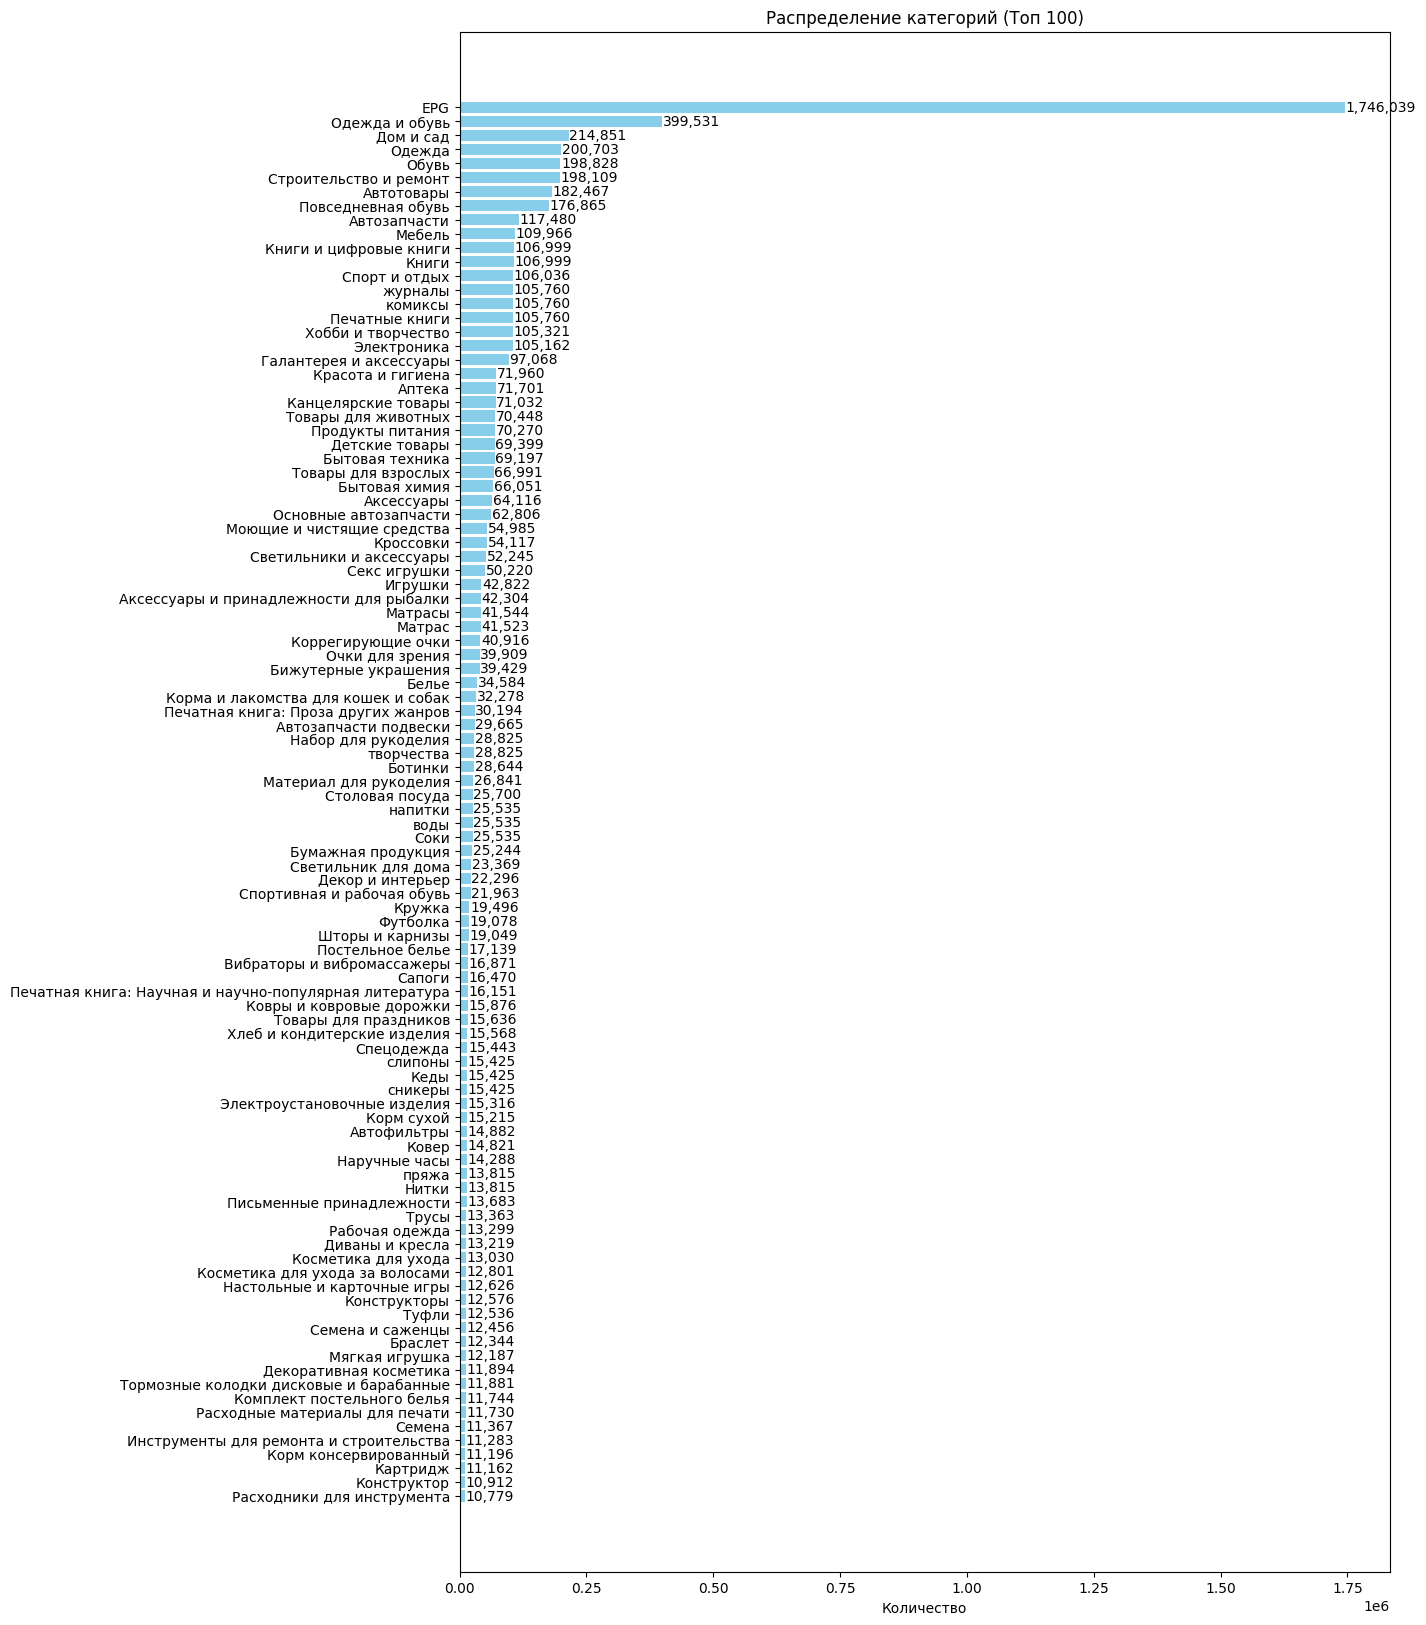

In [9]:
sorted_data = dict(sorted(cat_counts.items(), key=lambda item: item[1], reverse=True))

top_100_data = dict(list(sorted_data.items())[:100])

# Построение горизонтальной гистограммы для первых 100 элементов
plt.figure(figsize=(12, 20))
bars = plt.barh(list(top_100_data.keys()), list(top_100_data.values()), color='skyblue')
plt.xlabel('Количество')
plt.title('Распределение категорий (Топ 100)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наибольшие значения были сверху

# Добавление меток с количеством рядом с каждым столбиком
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000,  # Смещение метки по оси X
             bar.get_y() + bar.get_height()/2,  # Вертикальное расположение метки
             f'{int(width):,}',  # Текст метки с форматированием числа
             va='center')

plt.show()

Теперь посмотрим что у нас с атрибутами 

In [10]:
def print_n_attributes(df, n):
    """
    Функция выводит n первых атрибутов
    
    """
    for row in df[:n]['characteristic_attributes_mapping']:
        print(row)


def get_uniq_attributes(df):
    """
    Функция возвращает dict из уникальных атрибутов

    return: dict

    """
    result_dict = dict()
    for row in df[:]['characteristic_attributes_mapping']:
        #print(row)
        row_dct = json.loads(row)


        for key, val in row_dct.items():
            if result_dict.get(key) is None:
                result_dict[key] = set()
                result_dict[key].update(val)
            else:
                result_dict[key].update(val)

    return result_dict

def get_uniq_attributes_count(uniq_attr):
    """
    Функция возвращает dict из атрибута: количества элементов

    return: dict

    """
    result_dict = dict()
    for key, val in uniq_attr.items():
        result_dict[key] = len(val)

    return result_dict

In [11]:
print_n_attributes(df_merge, 10)

{"Цвет товара": ["бежевый", "светло-розовый"], "Пол ребенка": ["Унисекс"], "Бренд": ["Funny Ducks"], "Тип": ["Игрушка для ванной"], "Страна-изготовитель": ["Китай"], "Развитие навыков": ["Воображение", "Кругозор", "Моторика"], "Код ТРУ": ["320000000.03051400500000000000"], "Минимальный возраст ребенка": ["От 3 лет"], "Материал": ["ПВХ пластизоль"], "Вес товара, г": ["50"], "Максимальный возраст ребенка": ["До 18 лет"]}
{"Количество в упаковке, шт": ["1"], "Бренд": ["Нет бренда"], "Тип": ["Стразы"], "Материал": ["Акрил"], "Вес товара, г": ["20"]}
{"Бренд": ["Vervaco"], "Тип": ["Набор для вышивания"], "Страна-изготовитель": ["Бельгия"], "Материалы набора": ["Акрил", "Бумага", "Канва", "Металл", "Хлопок"], "Техника вышивки": ["Простой крест"], "Возрастные ограничения": ["От 7 лет"], "Длина по горизонтали, см": ["40"], "Длина по вертикали, см": ["40"], "Размеры, мм": ["400 х 400"]}
{"Цвет товара": ["серый"], "Ширина, см": ["0.8"], "Бренд": ["Prym"], "Тип": ["Тесьма"], "Состав ниток": ["Тка

In [18]:
uniq_attr = get_uniq_attributes(df_merge)
#print(uniq_attr)
print(len(uniq_attr))

uniq_attr_count = get_uniq_attributes_count(uniq_attr)
print(uniq_attr_count)
#print(len(uniq_attr_count))

6016
{'Цвет товара': 526, 'Пол ребенка': 3, 'Бренд': 57885, 'Тип': 10735, 'Страна-изготовитель': 179, 'Развитие навыков': 17, 'Код ТРУ': 210, 'Минимальный возраст ребенка': 31, 'Материал': 1079, 'Вес товара, г': 11312, 'Максимальный возраст ребенка': 29, 'Количество в упаковке, шт': 275, 'Материалы набора': 112, 'Техника вышивки': 23, 'Возрастные ограничения': 47, 'Длина по горизонтали, см': 308, 'Длина по вертикали, см': 311, 'Размеры, мм': 92293, 'Ширина, см': 1891, 'Состав ниток': 82, 'Длина, м': 899, 'Название цвета': 176919, 'Минимальная продолжительность партии, мин.': 22, 'Минимальное число игроков': 12, 'Максимальное число игроков': 26, 'Вид выпуска товара': 3, 'Целевая аудитория': 6, 'Вид настольной игры': 24, 'Максимальная продолжительность партии, мин.': 31, 'Целевая аудитория игры': 6, 'Артикул': 493232, 'Вес, кг': 2444, 'Размерность': 429, 'Материал чехла': 108, 'Материал наполнителя': 232, 'Плотность наполнителя, г/м2': 99, 'Количество предметов в комплекте': 41, 'Техноло

Выведем несколько Descriptions

In [19]:
def print_n_descriptions(df, n):
    """
    Функция выводит n первых описаний
    
    """
    for row in df[:n]['description']:
        print(row)

In [20]:
print(print_n_descriptions(df_merge, 10))

Серия  уточек бренда FUNNY DUCKS представлена уточками стандартной формы, которые раскрашены в моноцвета или украшены каким-либо узором, орнаментом, простым головным убором. Данные уточки изображают лиц конкретной профессии, животных или героев книг и фильмов.<br/>Дизайнерские уточки - это еще и яркий сувенир интересной формы.
Стразы(бусины) клеевые на листе 9*16 см
Состав набора: канва-страмин Zweigart с нанесенным рисунком №4,5 (18 клеточек/10 см) 100% хлопок, нитки 100% акрил, обратная сторона подушки с молнием (джинсовая ткань 100% хлопок), игла, схема, инструкция на русском языке. <br> Внимание: наполнитель не входит в набор. <br> Размер готовой работы: диаметр 40 см. <br> Вышивание крестом отвлечет вас от повседневных забот и превратится в увлекательное занятие! Работа, сделанная своими руками, создаст особый уют и атмосферу в доме и долгие годы будет радовать вас и ваших близких. <br> Размер готовой работы: 40х28 см. <br> Техника вышивания - печатный крест, полная вышивка. <br> 